In [1]:
#import the libraries

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [2]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [3]:
#old model
model = keras.Sequential([
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(32, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(64, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, (3,3), activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(1, activation="sigmoid"),

  
])

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [4]:
#Define the architecture

# Here, you define, the number of layers, the number of neurons per layer, and the activations, include the parameter input_shape, in the first layer, so you can print the architecure

#your code here

newModel = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(32, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(64, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, (3,3), activation="relu"),

  keras.layers.Flatten(),
  keras.layers.Dropout(.5),
  keras.layers.Dense(1, activation="sigmoid"),

  
])

newModel.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [5]:
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [6]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


rm: cannot remove '/root/.kaggle': No such file or directory


In [7]:
!rm -rd train
!rm -rd test1
!rm dogs-vs-cats.zip
!rm sampleSubmission.csv
!rm test1.zip
!rm train.zip

rm: cannot remove 'train': No such file or directory
rm: cannot remove 'test1': No such file or directory
rm: cannot remove 'dogs-vs-cats.zip': No such file or directory
rm: cannot remove 'sampleSubmission.csv': No such file or directory
rm: cannot remove 'test1.zip': No such file or directory
rm: cannot remove 'train.zip': No such file or directory


In [8]:
#Load the data
!kaggle competitions download -c dogs-vs-cats

!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip
!unzip -qq test1.zip

 98% 795M/812M [00:06<00:00, 141MB/s]
100% 812M/812M [00:06<00:00, 132MB/s]


In [9]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=3000)
make_subset("test", start_index=3000, end_index=5000)

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [11]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 21s 73ms/step - loss: 0.6920 - accuracy: 0.5245 - val_loss: 0.6962 - val_accuracy: 0.5245
Epoch 2/30
125/125 [==============================] - 9s 70ms/step - loss: 0.6620 - accuracy: 0.6170 - val_loss: 0.7095 - val_accuracy: 0.6345
Epoch 3/30
125/125 [==============================] - 8s 62ms/step - loss: 0.6190 - accuracy: 0.6687 - val_loss: 0.5817 - val_accuracy: 0.6875
Epoch 4/30
125/125 [==============================] - 8s 62ms/step - loss: 0.5704 - accuracy: 0.7042 - val_loss: 0.5810 - val_accuracy: 0.7045
Epoch 5/30
125/125 [==============================] - 9s 67ms/step - loss: 0.5246 - accuracy: 0.7455 - val_loss: 0.5236 - val_accuracy: 0.7395
Epoch 6/30
125/125 [==============================] - 9s 70ms/step - loss: 0.4833 - accuracy: 0.7692 - val_loss: 0.5140 - val_accuracy: 0.7565
Epoch 7/30
125/125 [==============================] - 9s 70ms/step - loss: 0.4390 - accuracy: 0.7958 - val_loss: 0.5057 - val_accuracy: 0.767

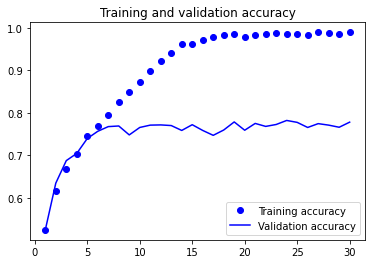

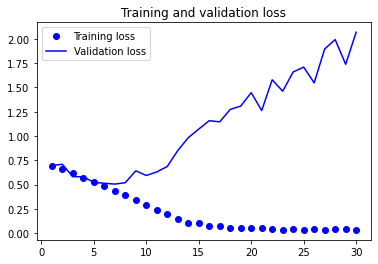

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 5s 35ms/step - loss: 0.4952 - accuracy: 0.7717
Test accuracy: 0.772


new model

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = newModel.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


125/125 [==============================] - 33s 211ms/step - loss: 0.7100 - accuracy: 0.5105 - val_loss: 0.6839 - val_accuracy: 0.5705
Epoch 2/30
125/125 [==============================] - 26s 208ms/step - loss: 0.6840 - accuracy: 0.6008 - val_loss: 0.6537 - val_accuracy: 0.6245
Epoch 3/30
125/125 [==============================] - 26s 210ms/step - loss: 0.6335 - accuracy: 0.6467 - val_loss: 0.6285 - val_accuracy: 0.6280
Epoch 4/30
125/125 [==============================] - 27s 211ms/step - loss: 0.6276 - accuracy: 0.6643 - val_loss: 0.6215 - val_accuracy: 0.6395
Epoch 5/30
125/125 [==============================] - 27s 211ms/step - loss: 0.5985 - accuracy: 0.6795 - val_loss: 0.5658 - val_accuracy: 0.7030
Epoch 6/30
125/125 [==============================] - 27s 212ms/step - loss: 0.5836 - accuracy: 0.6923 - val_loss: 0.6539 - val_accuracy: 0.6365
Epoch 7/30
125/125 [==============================] - 27s 211ms/step - loss: 0.5679 - accuracy: 0.7057 - val_loss: 0.5562 - val_accuracy: 0.7

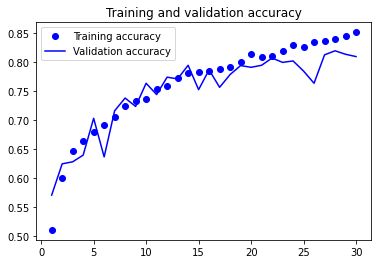

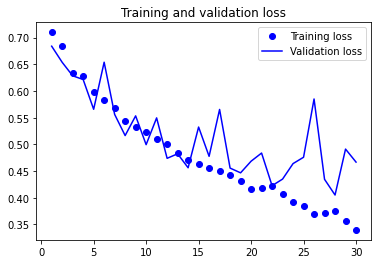

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
test_model = keras.models.load_model("convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 5s 35ms/step - loss: 0.3727 - accuracy: 0.8418
Test accuracy: 0.842


PART B

In [18]:
#rm data
!rm -rd train
!rm -rd test1
!rm dogs-vs-cats.zip
!rm sampleSubmission.csv
!rm test1.zip
!rm train.zip

In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [20]:
model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(32, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(64, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, (3,3), activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dropout(.5),
  keras.layers.Dense(5, activation="softmax"),
  
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

In [21]:
#Load the data
# may need to move to another file test.zip and train.zip exist
!kaggle competitions download -c cassava-disease
!unzip -qq cassava-disease.zip
!unzip -qq train.zip
!unzip -qq test.zip

 99% 2.28G/2.30G [00:26<00:00, 181MB/s]
100% 2.30G/2.30G [00:27<00:00, 91.5MB/s]


In [22]:
from tensorflow.keras.utils import image_dataset_from_directory

# 80% of training dir is used for training
train_dataset = image_dataset_from_directory(
    "train",
    image_size=(300, 300),
    batch_size=32, validation_split=0.2, subset="training", seed=5462)

# 20% of training dir is used for validation
validation_dataset = image_dataset_from_directory(
    "train",
    image_size=(300, 300),
    batch_size=32, validation_split=0.2, subset="validation", seed=5368)

#test dataset
test_dataset = image_dataset_from_directory(
    "test",
    image_size=(300, 300),
    batch_size=32)

Found 5656 files belonging to 5 classes.
Using 4525 files for training.
Found 5656 files belonging to 5 classes.
Using 1131 files for validation.
Found 3774 files belonging to 1 classes.


In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


142/142 [==============================] - 58s 331ms/step - loss: 1.2967 - accuracy: 0.4997 - val_loss: 1.3015 - val_accuracy: 0.5597
Epoch 2/100
142/142 [==============================] - 47s 322ms/step - loss: 1.1845 - accuracy: 0.5744 - val_loss: 1.0921 - val_accuracy: 0.6004
Epoch 3/100
142/142 [==============================] - 46s 320ms/step - loss: 1.1232 - accuracy: 0.5920 - val_loss: 1.0531 - val_accuracy: 0.6260
Epoch 4/100
142/142 [==============================] - 45s 314ms/step - loss: 1.0660 - accuracy: 0.6239 - val_loss: 1.0187 - val_accuracy: 0.6331
Epoch 5/100
142/142 [==============================] - 45s 313ms/step - loss: 1.0275 - accuracy: 0.6349 - val_loss: 1.0598 - val_accuracy: 0.6118
Epoch 6/100
142/142 [==============================] - 46s 319ms/step - loss: 1.0440 - accuracy: 0.6250 - val_loss: 0.9753 - val_accuracy: 0.6481
Epoch 7/100
142/142 [==============================] - 46s 319ms/step - loss: 1.0096 - accuracy: 0.6376 - val_loss: 0.9765 - val_accurac

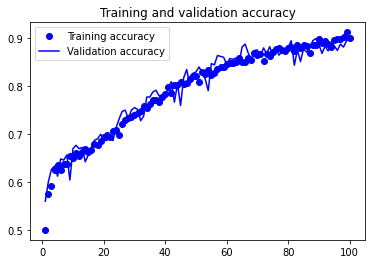

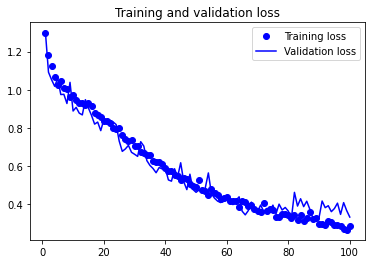

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()